<a href="https://colab.research.google.com/github/captmmari/Decsriptive-analysis-Independent-project/blob/main/Simon_Mmari_Independent_Project_Week04_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1.0 Defining the question.

Is the number of Bluecars taken in area X different than in area Y? 

# 1.1.1 Metrics for success

In this analysis I will be able to;
1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing.
4. Challenge our solution by providing insights on how we can make improvements.

From the analysis done in google Collaboratory, we have proof that we will not reject the null, this is because, for every day, the answers are different but fair.
With this, we will be able to use a T-test to be able to find the mean of the two values picked.


# 1.1.2 Understanding the context

I will seek to understand Bluecars usage by solving for another research question.
I will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.
To do this, I need to identify some areas and periods of interest via sampling stating the reason to the choice of method,Then perform hypothesis testing with regards to the claim that we will have made. I wil be using this claim,(Is the number of Bluecars taken sum greater than the numbers of Utilib 14 taken sum during the weekday)
The selected periods of interest be either weekdays or weekends as I seem to not work with a mixture since it is big and it is not necessary to use both at in a mixture
We can also consider postal codes as some of the areas of interest.


# 1.1 Importing the libraries.

In [159]:
# Importing libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas_profiling
import warnings
import random
from scipy.stats import bernoulli



# 1.2 loading the dataset.

In [132]:
# Loading Autolib Dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv')
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [133]:
# Top of the dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [134]:
# Bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [135]:
# Checking Dataset shape
df.shape

(16085, 13)

In [136]:
# Checking statistical Dataset description
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [138]:
# check the columns that are in our dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [139]:
#  Checking whether each column has an appropriate datatypes
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [140]:
# check for unique values in our autolib dataset
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [141]:
# Checking for a specific column
df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [142]:
df['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# 1.3 Cleaning th Dataset.


In [143]:
# Checking for null values
df.isnull().sum()

# No null value present in this dataset

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [95]:
# Checking for duplicates
df.duplicated().sum()

# No duplicates in this dataset

0

In [96]:
# Rename and correcting column names
df.rename({'n_daily_data_points' : 'Daily_points', 'BlueCars_taken_sum' : 'Bluecars_taken', 'BlueCars_returned_sum' : 'Bluecars_returned', 'Utilib_taken_sum' : 'Utilib_returned_sum', 'Utilib_14_taken_sum' : 'Utilib14_taken', 'Utilib_14_returned_sum' : 'Utilib14_returned', 'Slots_taken_sum' : 'Slotstaken', 'Slots_freed_sum' : 'Slotsfreed'}, axis=1, inplace=True)
df.head()

# For easier remembrance and input names in collab

,Postal code,date,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


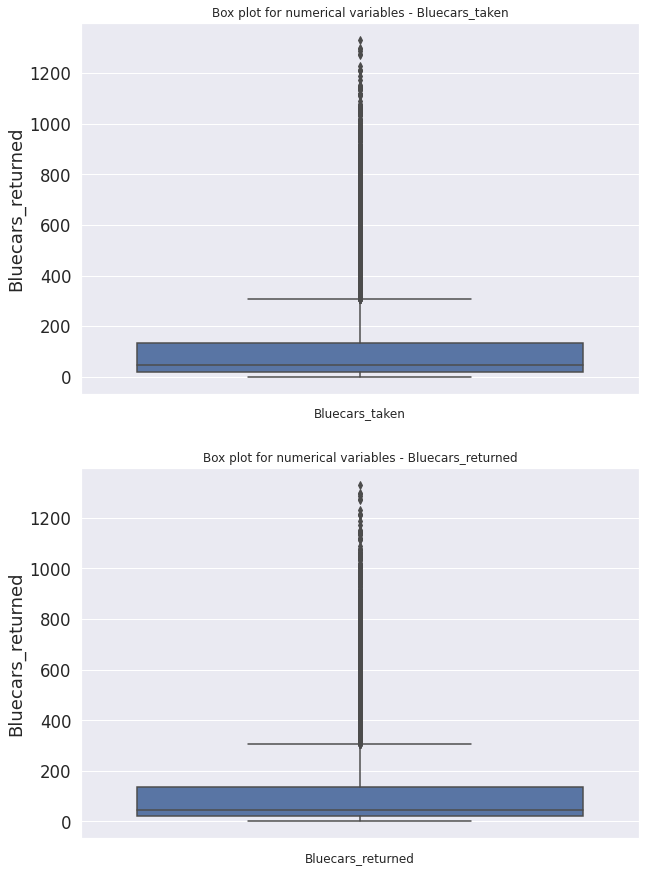

In [97]:

col_names= ['Bluecars_taken','Bluecars_returned',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df['Bluecars_returned'], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [98]:
# Dropping unnecessary columns
df1 = df.drop('date', axis = 1)
df1.drop
df1

# Dropped columns because I will not use the columns in my analysis

,Postal code,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,1440,0,weekday,11,14,3,5,2,2,0,0


In [99]:
# Converting the day of week from from numericals to strings for plotting
# Uning the mapping function
# 

df1['dayOfWeek'] = df1.dayOfWeek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})

# For easier identification of days in a week.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [100]:
# Calling out Cleaned Dataset
df1.head()

,Postal code,Daily_points,dayOfWeek,day_type,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
0,75001,1440,Monday,weekday,110,103,3,2,10,9,22,20
1,75001,1438,Tuesday,weekday,98,94,1,1,8,8,23,22
2,75001,1439,Wednesday,weekday,138,139,0,0,2,2,27,27
3,75001,1320,Thursday,weekday,104,104,2,2,9,8,25,21
4,75001,1440,Friday,weekday,114,117,3,3,6,6,18,20


# 1.4 Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


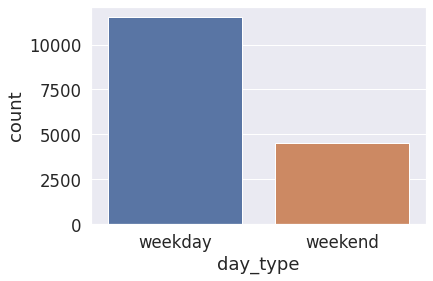

In [101]:
# Plotting the count on different day types info
sns.countplot(df1['day_type'])

# Weekdays is when most activities actually happen

In [102]:
# Modal day date
df1['dayOfWeek'].mode()

0    Monday
dtype: object

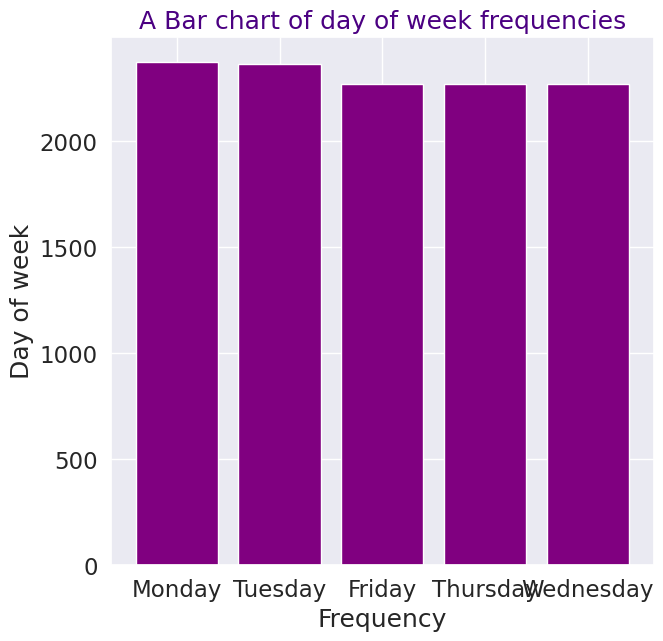

In [103]:
# Barc chart representing day of week frequencies.
day = df1.dayOfWeek.value_counts()
day


sizes= day.index
sizes


data = day.values
data

plt.figure(figsize = (7,7), dpi = 100)
plt.bar(sizes, data, color = 'purple')
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Bar chart of day of week frequencies", color = 'indigo')
plt.show()

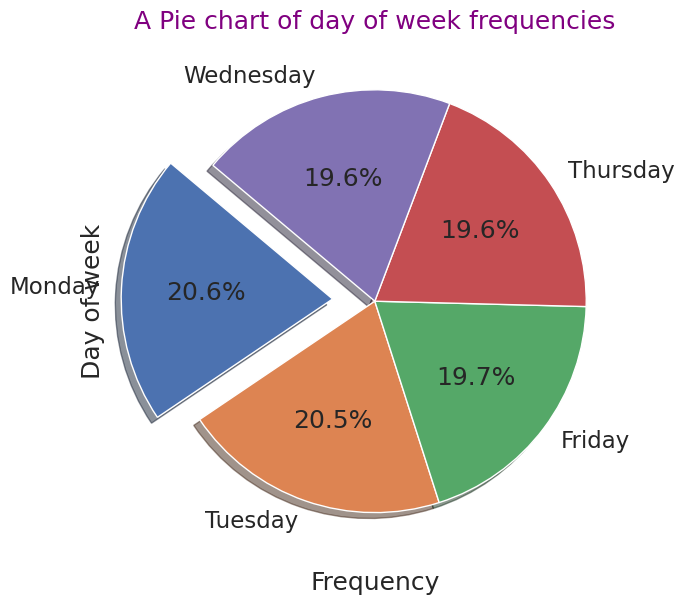

In [104]:
# Pie chart of each day activity
day2 = df1.dayOfWeek.value_counts()
day2


sizes2= day.index
sizes2


data2 = day.values
data2



plt.figure(figsize = (7,7), dpi = 100)
plt.pie(data2, labels = sizes2, autopct = '%1.1f%%', shadow = True, explode = (0.2,0,0,0,0), startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week frequencies", color = 'purple')
plt.show()


# Monday is the most frequent day along the week in terms of operations in the company

In [105]:
# Most appeared Day type in the dataset
df['day_type'].mode()

0    weekday
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


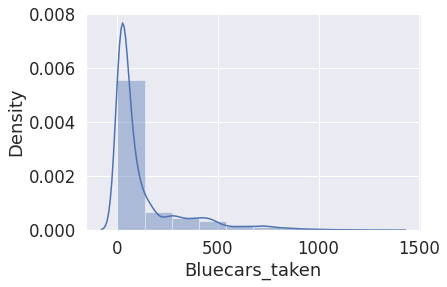

In [106]:
# Ditribution plot for respondent age
sns.distplot(df1['Bluecars_taken'], bins=10)

In [107]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

df1.groupby('dayOfWeek')['Bluecars_returned'].sum().sort_values()



# Friday was when most blue cars were returned.
# while Tuesday was when the least number of blue cars were returned.

dayOfWeek
Tuesday      260470
Wednesday    260673
Thursday     262961
Monday       264808
Friday       286029
Name: Bluecars_returned, dtype: int64

In [108]:
# Frequency table showing sum of bluecars returned by day of week in ascending order.

df1.groupby('dayOfWeek')['Bluecars_taken'].sum().sort_values()



# Friday was when most blue cars were taken.
# while Wednesday was when the least number of blue cars were taken.

dayOfWeek
Wednesday    261849
Tuesday      261940
Thursday     263207
Monday       263893
Friday       288546
Name: Bluecars_taken, dtype: int64

In [109]:
df1['dayOfWeek'].describe()

count      11544
unique         5
top       Monday
freq        2374
Name: dayOfWeek, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


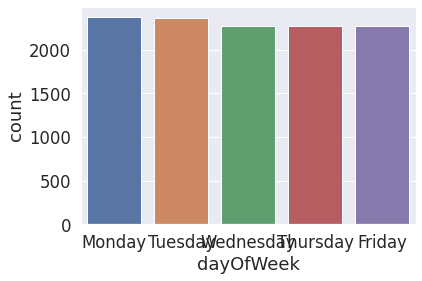

In [110]:
# Plotting the count on each day information
sns.countplot(df1['dayOfWeek'])


In [111]:
# Modal day of week of operation
df1['day_type'].mode()

0    weekday
dtype: object

In [112]:
# Checking of type of Day mostly active
df1['day_type'].value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

# 1.5 Bivariate Analysis


In [113]:
# Mean number of Bluecars Taken
df1['Bluecars_taken'].mean()

125.92695057506994

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


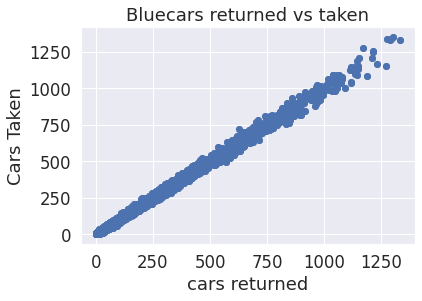

In [114]:
# Scatter plot of Bluecars taken vs returned
df1.plot(x = 'Bluecars_returned', y = 'Bluecars_taken', kind='scatter')
plt.scatter(df1["Bluecars_returned"] , df1["Bluecars_taken"])
sns.regplot(x = df1["Bluecars_returned"], y = df1["Bluecars_taken"], fit_reg=False)
plt.title('Bluecars returned vs taken')
plt.xlabel('cars returned')
plt.ylabel('Cars Taken')
plt.show()

In [115]:
# Checking how our varibales are corelated using a matrix
corrMatrix = df1.corr()
corrMatrix

,Postal code,Daily_points,Bluecars_taken,Bluecars_returned,Utilib_returned_sum,Utilib_returned_sum,Utilib14_taken,Utilib14_returned,Slotsfreed,Slotstaken
Postal code,1.000000,0.000432,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
Daily_points,0.000432,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
Bluecars_taken,-0.698020,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
Bluecars_returned,-0.697519,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_returned_sum,-0.625521,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib14_taken,-0.656744,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib14_returned,-0.656516,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slotsfreed,-0.749528,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
Slotstaken,-0.749157,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


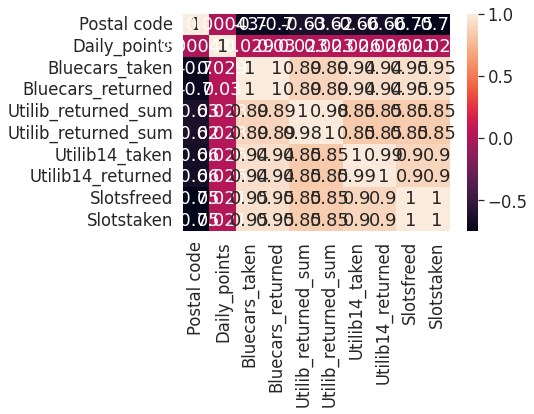

In [116]:
# investigating the correlation between vari ables

corelation = df1.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

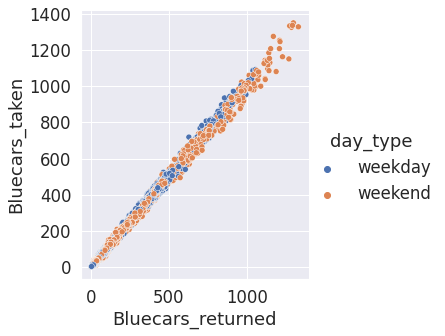

In [84]:
# Plotting Realational Plots
sns.relplot( x = 'Bluecars_returned', y = 'Bluecars_taken', hue = 'day_type',data = df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


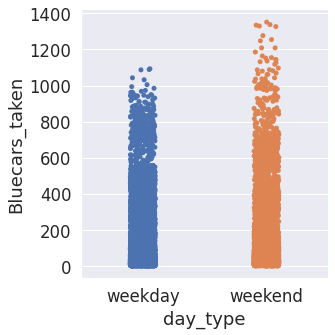

In [128]:
# Plotting our categorical data of Bluecars taken during a week
sns.catplot('day_type', 'Bluecars_taken', data = df1)

# From this illustration we notice that the number of blue cars taken is  majorly done in the weekend

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


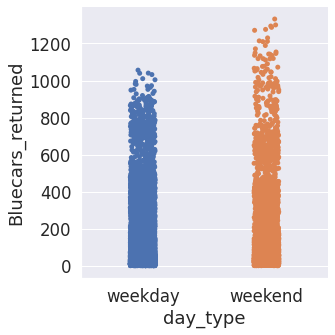

In [118]:
# Plotting our categorical data of Bluecars returned during a week
sns.catplot('day_type', 'Bluecars_returned', data = df1)
# Most blue cars returned during a week is also done mostly in the weekend

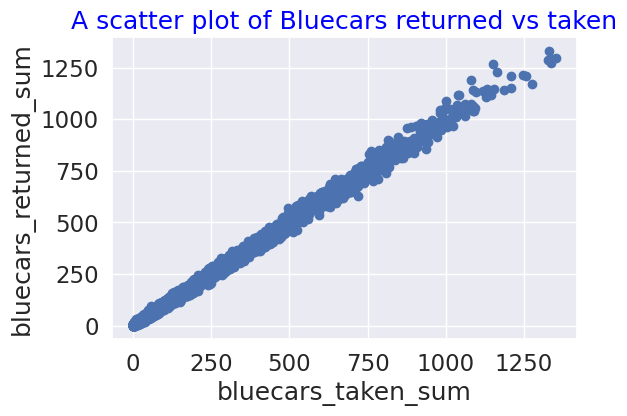

In [119]:
# Scatter plot showing the relationship between Bluecars taken and Returned
plt.figure(dpi = 100)
plt.scatter(df1['Bluecars_taken'], df1['Bluecars_returned'])
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')
plt.show()
# The rate at which the blue cars are taken to the rate at which bluecars are returned are almost similar and at par

# 1.7 Hypothesis Testing

is the number of Bluecars taken sum greater than the numbers of Utilib 14 taken sum during the weekday?

Stating the null and alternative hypothesis
Ho The average number of Bluecars taken is equal to the mean 132
Ha The average number of BLue cars taken is not equal to the mean 132

In [178]:
# Sampling
df1 = df1.sample(n = 10, replace="False")
print(df1)

       Postal code  Daily_points  ... Slotsfreed Slotstaken
5939         92200          1440  ...          0          0
2139         75014          1440  ...        117        127
10299        93130          1440  ...          0          0
9715         92700          1440  ...          0          0
3273         75112          1440  ...          1          1
2139         75014          1440  ...        117        127
3273         75112          1440  ...          1          1
10299        93130          1440  ...          0          0
9715         92700          1440  ...          0          0
9026         92400          1439  ...          6          7

[10 rows x 12 columns]


In [181]:
# Finding sample mean
sample_mean = df1['Bluecars_taken'].mean()
sample_mean

132.1

In [173]:
# Finding the zscore
zscore = sample_mean - (df1['Bluecars_taken'].mean())/df1['Bluecars_taken'].std()
zscore

146.97070514661252

In [182]:
#Calculating the p value using z test
from statsmodels.stats.weightstats import ztest as ztest
ztest,pval = ztest(df1['Bluecars_taken'],df1['Bluecars_taken'])

print("This is our p-value", pval)
print("This is value of the ztest", ztest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

This is our p-value 1.0
This is value of the ztest 0.0
We accept the Null Hypothesis


In [183]:
#testing for normality for Blue cars
from scipy.stats import shapiro 
stat, p = shapiro(df1['Bluecars_taken'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality for GDP hrowth

stat, p = shapiro(df1['Bluecars_taken'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.701, p=0.001
Sample does not look Gaussian
Statistics=0.701, p=0.001
Sample does not look Gaussian


In [160]:
!pip install pymc

     |████████████████████████████████| 385 kB 5.5 MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp37-cp37m-linux_x86_64.whl size=1353090 sha256=0662d54cf302ff86fef3ca1f8549372c20674b3dcf393e7d4296eb7e5c5ea849
  Stored in directory: /root/.cache/pip/wheels/3b/9b/1d/2a2ddbe80519db2698745f0988ce50c36ad38aac886a4ee0ca
Successfully built pymc


In [165]:
from pymc import *
from scipy.stats import bernoulli
import pymc.Matplot as plott

In [162]:
#We then proceed to define our prior distributions. 


def setup_priors(data):
    ''' setup priors. takes in combined taken sum as input'''
    priors = dict()

    # Setup our priors
    lower = np.var(data)/1000.0
    upper = np.var(data)*1000

    v = pm.Exponential("nu", beta=1.0/29) + 1
    tau = 1.0/np.var(data)/1000.0
    mu1 = pm.Normal('mu1', mu=np.mean(data), tau=tau)
    var1 = pm.Uniform('var1', lower=lower, upper=upper)

    mu2 = pm.Normal('mu2', mu=np.mean(data), tau=tau)
    var2 = pm.Uniform('var2', lower=lower, upper=upper)

    priors['mu1'] = mu1
    priors['var1'] = var1
    priors['mu2'] = mu2
    priors['var2'] = var2
    priors['v'] = v
    
    return priors

In [ ]:
#We then define the models

def generate_models(values, values2, priors):
    '''generate models based on priors and given samples'''
    v = priors['v']
    mu1 = priors['mu1']
    var1 = priors['var1']
    lam1 = 1.0/var1

    mu2 = priors['mu2']
    var2 = priors['var2']
    lam2 = 1.0/var2

    # Include our observed data into the model
    t1 = pm.NoncentralT("t1", mu=mu1, lam=lam1, nu=v, value=values, observed=True)
    t2 = pm.NoncentralT("t2", mu=mu2, lam=lam2, nu=v, value=values2, observed=True)
    # Push our priors into a model
    model = pm.Model([t1, mu1, var1, t2, mu2, var2, v])
    
    return model

In [167]:
# Samples drawn from the prior distribution show that the prior is uniformly distributed between 0 and 1 on the x axis.
def create_model(data):

    uni_prior = Uniform('Bluecars_taken', lower=0,upper=1.0 )
    bern = Bernoulli('bern',p=uni_prior, value=data,observed=True)
    model=Model([uni_prior,bern])
    return model

/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 5000 of 5000 complete in 0.4 secGenerating histogram of Bluecars_taken


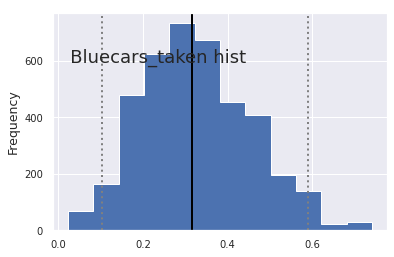

In [168]:
sample_size=10

def get_traces(sample_size):
    data=bernoulli.rvs(0.3,size=sample_size)
    model=create_model(data)
    model.seed()
    mc1 = MCMC(model)
    mc1.sample(iter=5000,burn=1000)
    return mc1,mc1.trace('Bluecars_taken')[:]

mc1,traces=get_traces(sample_size)
plott.histogram(traces,"Bluecars_taken")

In [ ]:
num_samples=[20,50,100,500,5000]
for i in num_samples:
    m,traces=get_traces(i)
    plott.histogram(traces,"num samples = "+str(i),datarange=(0,0.6))

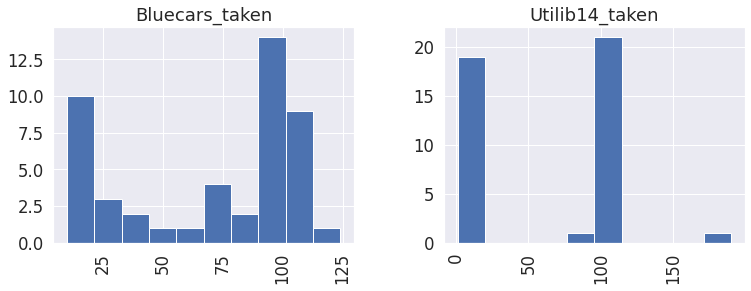

In [147]:
Bluecars_taken=(28,100,70,14,102,67,35,15,98,101,10,12,105,13,10,85,102,16,
        39,72,82,102,100,12,102,11,22,23,13,103,77,47,63,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)

Utilib14_taken=(9,101,190,1,12,10,9,11,14,101,12,2,100,15,88,11,100,
           14,108,10,4,11,12,13,97,11,101,100,101,5,101,105,100,
           101,100,99,101,100,102,99,100,99)


y1 = np.array(Bluecars_taken)
y2 = np.array(Utilib14_taken)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Bluecars_taken']*len(Bluecars_taken), ['Utilib14_taken']*len(Utilib14_taken)]))

y.hist('value', by='group', figsize=(12, 4));

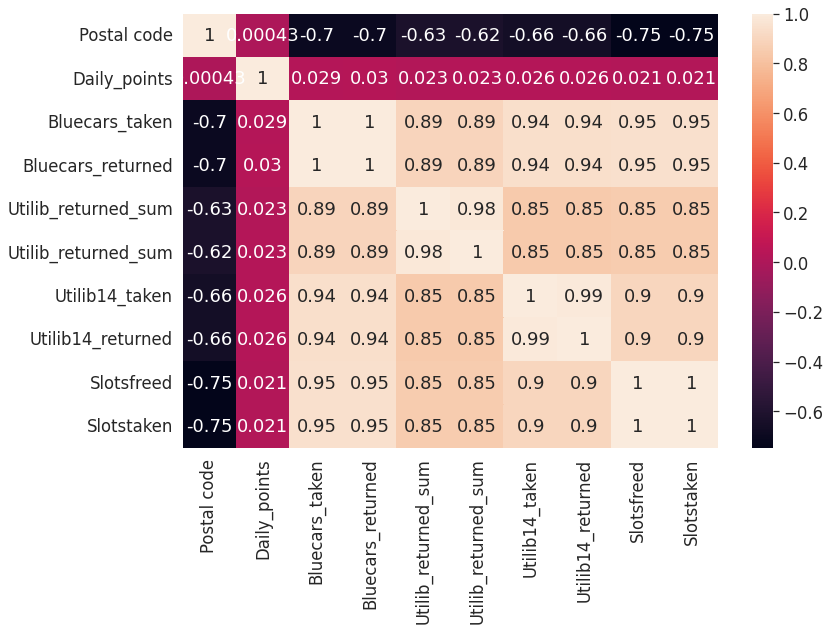

In [120]:
plt.figure(figsize=(12, 8))

df1_corr = df1.corr()
sns.heatmap(df1_corr, 
            xticklabels = df1_corr.columns.values,
            yticklabels = df1_corr.columns.values,
            annot = True);
# Slots taken and freed are normally operated on very well  and the business will run up pretty well

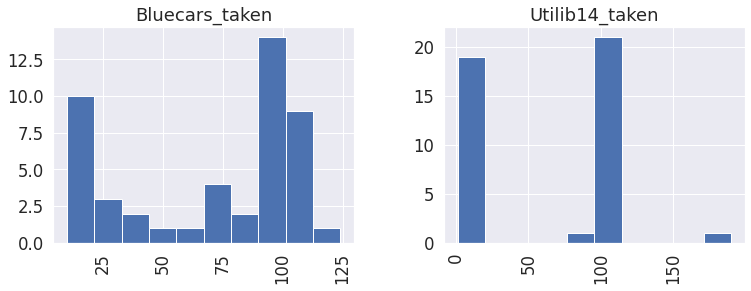

In [124]:
Bluecars_taken=(28,100,70,14,102,67,35,15,98,101,10,12,105,13,10,85,102,16,
        39,72,82,102,100,12,102,11,22,23,13,103,77,47,63,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)

Utilib14_taken=(9,101,190,1,12,10,9,11,14,101,12,2,100,15,88,11,100,
           14,108,10,4,11,12,13,97,11,101,100,101,5,101,105,100,
           101,100,99,101,100,102,99,100,99)


y1 = np.array(Bluecars_taken)
y2 = np.array(Utilib14_taken)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['Bluecars_taken']*len(Bluecars_taken), ['Utilib14_taken']*len(Utilib14_taken)]))

y.hist('value', by='group', figsize=(12, 4));

# We realize that bluecars are normally used as compared to Utilib cars

# 1.8 Conclusion

1. Blue cars are mostly used as compared to Utilib cars
2. Services done to bluecars are similar by 90%

We accept the null hypothesis. There is enough statistical evidence to prove that the mean number of Blue cars taken  is equal to 132.

# 1.9 Recommendation

1. Blue cars shows a great prospect in terms of growth of the compared to Utilib, therefore more emphasis should be put on Blue cars than utilib

# 2.0 Google Document

[https://docs.google.com/document/d/1SaeqVRIRnCBooB1qof90iQGl2qlYNFODMTXCnT8utKU/edit#]